In [127]:
import pandas as pd
data = pd.read_csv('C:/Users/PC/Desktop/ML code/1632300362534233.csv')
print(data.head())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [128]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB
None


In [129]:
print(data.isnull().sum())

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [130]:
print(data.describe())

              Room         Price    Price(USD)
count  3479.000000  3.479000e+03  3.479000e+03
mean      2.079908  5.359023e+09  1.786341e+05
std       0.758275  8.099935e+09  2.699978e+05
min       0.000000  3.600000e+06  1.200000e+02
25%       2.000000  1.418250e+09  4.727500e+04
50%       2.000000  2.900000e+09  9.666667e+04
75%       2.000000  6.000000e+09  2.000000e+05
max       5.000000  9.240000e+10  3.080000e+06


In [131]:
print(data['Area'].describe())
print(data['Price'].describe())

count     3479
unique     243
top         75
freq       111
Name: Area, dtype: object
count    3.479000e+03
mean     5.359023e+09
std      8.099935e+09
min      3.600000e+06
25%      1.418250e+09
50%      2.900000e+09
75%      6.000000e+09
max      9.240000e+10
Name: Price, dtype: float64


In [132]:
data['Area']= pd.to_numeric(data['Area'], errors='coerce')
data = data.dropna(subset=['Address'])
data = data[(data['Area'] >= 20) & (data['Area'] <=1000)]
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB
None


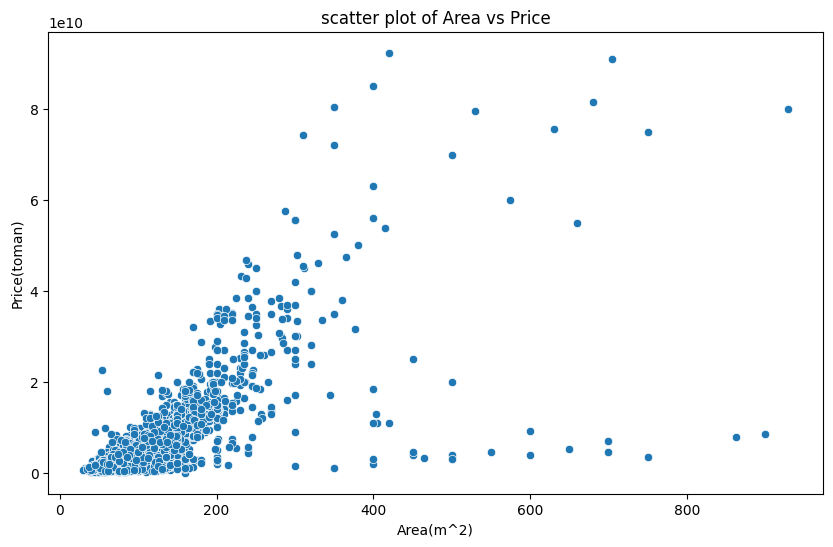

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Area',y='Price')
plt.title('scatter plot of Area vs Price')
plt.xlabel('Area(m^2)')
plt.ylabel('Price(toman)')
plt.show()

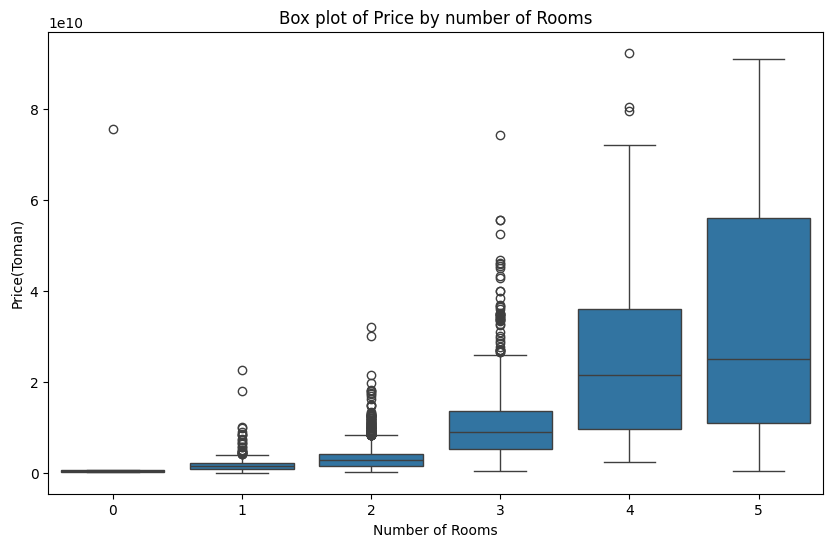

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , x='Room' , y= 'Price')
plt.title('Box plot of Price by number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price(Toman)')
plt.show()

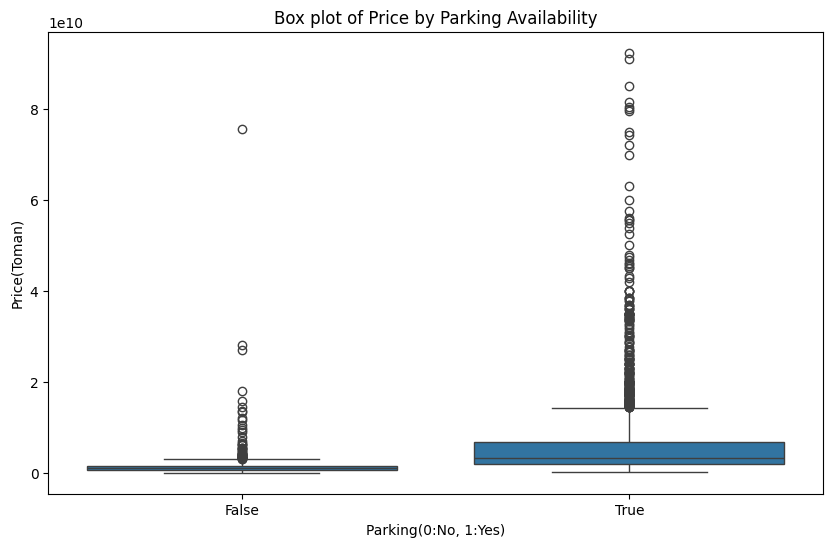

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , x='Parking', y='Price')
plt.title('Box plot of Price by Parking Availability')
plt.xlabel('Parking(0:No, 1:Yes)')
plt.ylabel('Price(Toman)')
plt.show()

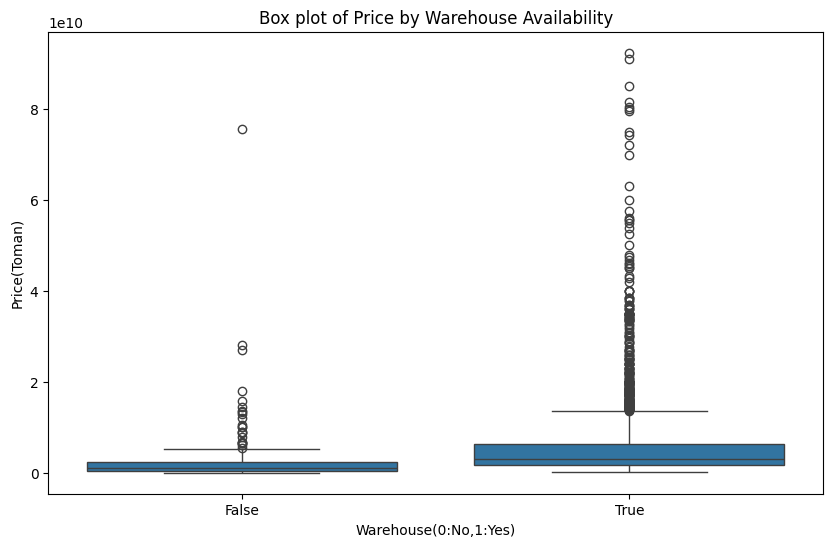

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , x='Warehouse', y='Price')
plt.title('Box plot of Price by Warehouse Availability')
plt.xlabel('Warehouse(0:No,1:Yes)')
plt.ylabel('Price(Toman)')
plt.show()

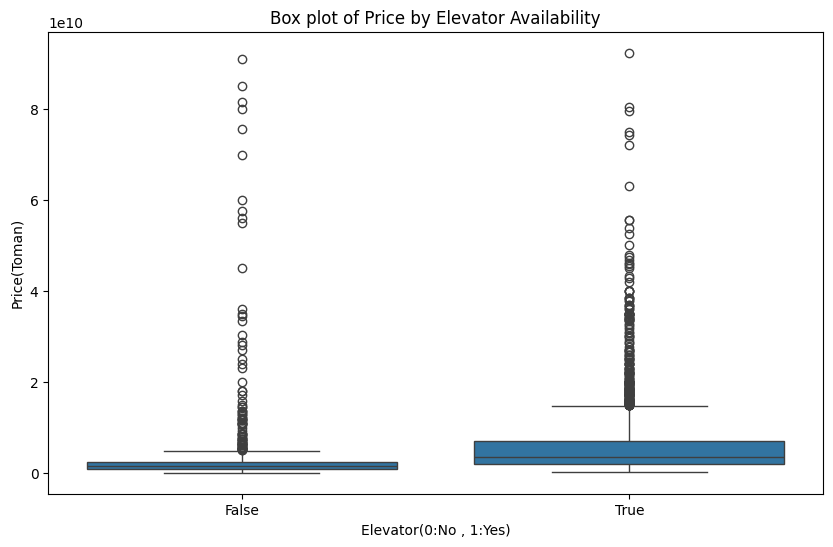

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , x='Elevator', y='Price')
plt.title('Box plot of Price by Elevator Availability')
plt.xlabel('Elevator(0:No , 1:Yes)')
plt.ylabel('Price(Toman)')
plt.show()

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
X = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]
Y = data['Price']

In [140]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

In [141]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [142]:
predictions = model.predict(X_test)

In [143]:
mse = mean_squared_error(Y_test,predictions)
r2 = r2_score(Y_test, predictions)

In [144]:
print(f'Mean squared error : {mse}')
print(f'r^2 score : {r2}')

Mean squared error : 3.540929461856839e+19
r^2 score : 0.5319739998689


In [145]:
coefficients = pd.DataFrame(model.coef_,X.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
Area       7.270779e+07
Room       1.350176e+09
Parking   -2.749686e+08
Warehouse  1.340286e+09
Elevator   9.995880e+08


In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rf_model = RandomForestRegressor(n_estimators=100 , random_state=26)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=26)

In [148]:
rf_predictions = rf_model.predict(X_test)

In [149]:
rf_mse = mean_squared_error(Y_test,rf_predictions)
rf_r2 = r2_score(Y_test,rf_predictions)
print(f'Random Forest mean squared error : {rf_mse}')
print(f'random fores r^2 score : {rf_r2}')

Random Forest mean squared error : 2.039930552010309e+19
random fores r^2 score : 0.7303700773802051


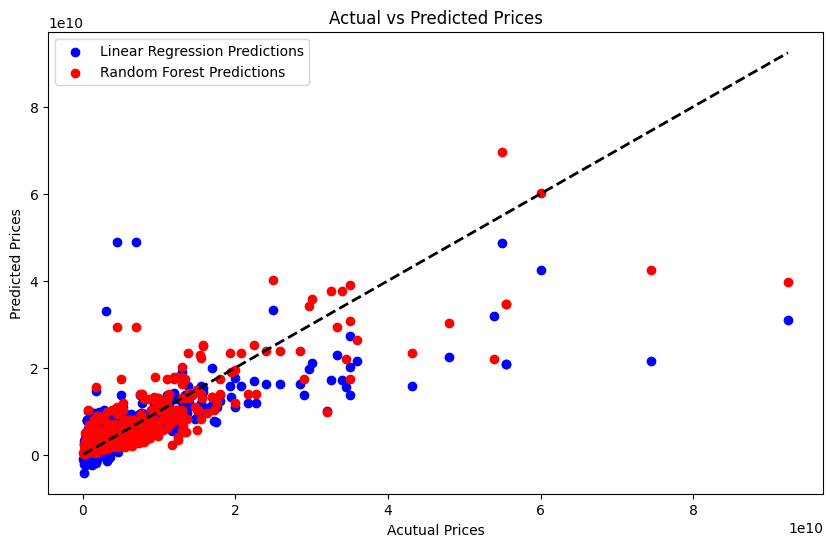

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test,predictions , color = 'blue' , label = 'Linear Regression Predictions')
plt.scatter(Y_test,rf_predictions , color='red', label = 'Random Forest Predictions')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],'k--', lw = 2)
plt.xlabel('Acutual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()